In [3]:
import pandas as pd

df_heart = pd.read_csv('heart_attack_prediction_dataset.csv')
df_heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### S03T01 - Remover duplicatas ou inconsistências.

#### Tratamento de inconsistências

In [4]:
#verificando duplicatas baseadas em IDs
duplicatas_por_id = df_heart[df_heart.duplicated(subset=['Patient ID'], keep=False)]
print(duplicatas_por_id)


Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


In [5]:
#verificando inconsistências em outras colunas
df_heart = df_heart[(df_heart['Blood Pressure'].str.contains('/')) & (df_heart['BMI'] >= 15) & (df_heart['BMI'] <= 40)]


In [6]:
#validando colunas categóricas
print(df_heart['Sex'].unique())
print(df_heart['Smoking'].unique())


['Male' 'Female']
[1 0]


In [7]:
#encontrando inconsistências
df_heart = df_heart[df_heart['Sex'].isin(['Male', 'Female'])]
df_heart = df_heart[df_heart['Smoking'].isin([0, 1])]


In [8]:
#verificando valores extremos (outliers)
print(df_heart.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

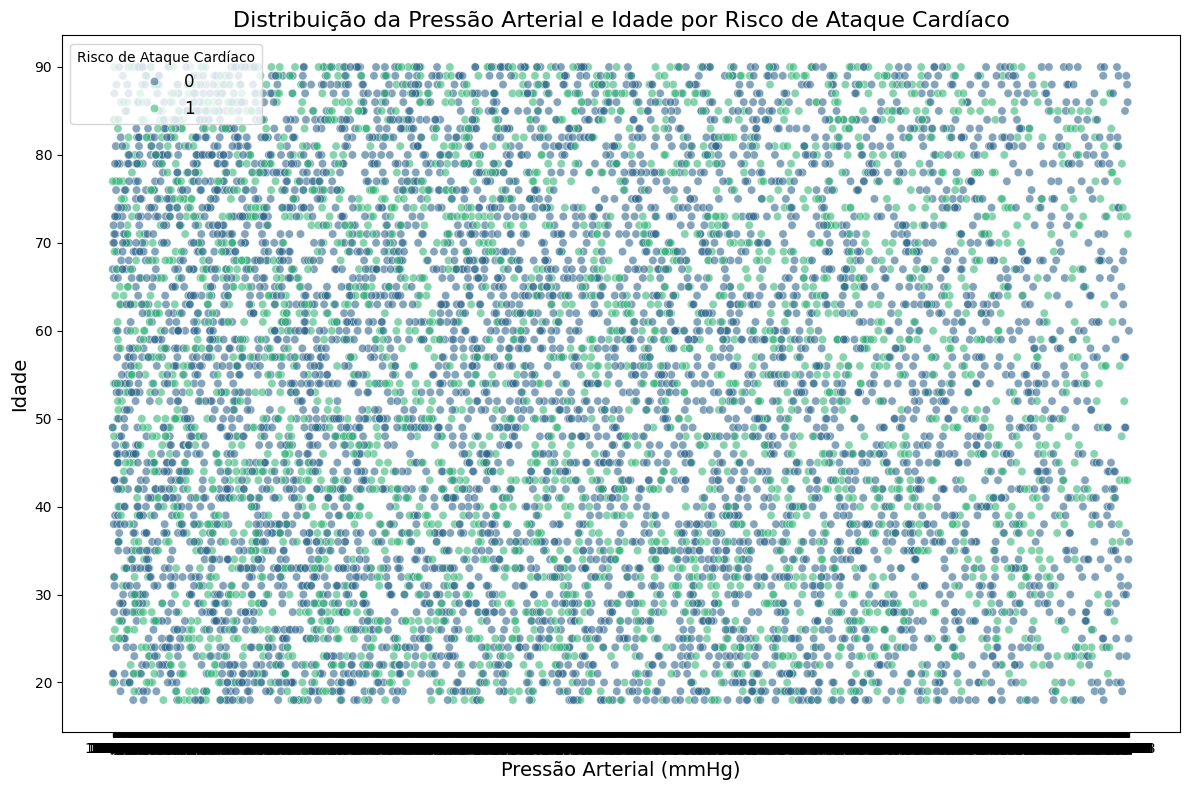

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustando o tamanho da figura
plt.figure(figsize=(12, 8))

# Criando um scatterplot para representar a relação entre Pressão Arterial e Idade
sns.scatterplot(x="Blood Pressure", y="Age", data=df_heart, alpha=0.6, hue="Heart Attack Risk", palette="viridis")

# Adicionando título e rótulos de eixos em português
plt.title("Distribuição da Pressão Arterial e Idade por Risco de Ataque Cardíaco", fontsize=16)
plt.xlabel("Pressão Arterial (mmHg)", fontsize=14)
plt.ylabel("Idade", fontsize=14)

# Adicionando legenda para Heart Attack Risk
plt.legend(title="Risco de Ataque Cardíaco", loc="upper left", fontsize=12)

# Melhorando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

C:\Users\Calebe\miniconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\Calebe\miniconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\Calebe\miniconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Calebe\miniconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)


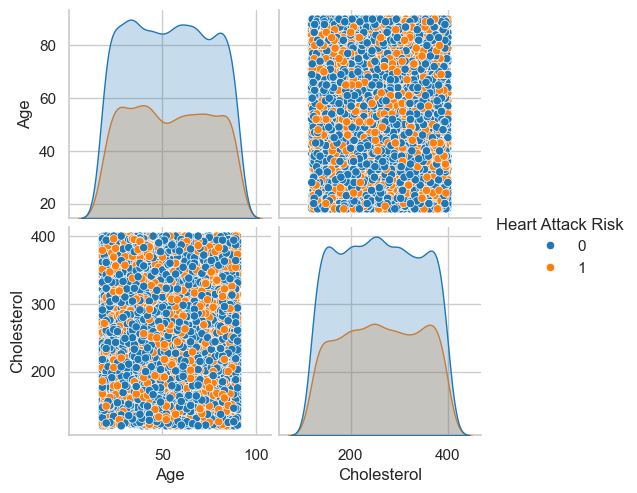

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando uma paleta personalizada de cores
custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e", "#2ca02c"])

# Criando o pairplot com a paleta personalizada
sns.pairplot(df_heart[['Blood Pressure', 'Age', 'Cholesterol', 'Heart Attack Risk']], hue='Heart Attack Risk', palette=custom_palette)

# Exibindo o gráfico
plt.show()



In [20]:
#tratamento de erros de digitação ou formatos incorretos
df_heart['Blood Pressure'] = df_heart['Blood Pressure'].str.replace(' ', '')  # Exemplo de correção

#Daqui

In [21]:
#verificando se há duplicatas 
print(df_heart.duplicated().sum())


0


In [22]:
#Verificar valores nulos:
print(df_heart.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64
